# Multi-energy generation systems - General formulation examples

***&copy; 2023 Martínez Ceseña<sup>1</sup> and Mancarella<sup>2</sup> — <sup>1,2</sup>University of Manchester, UK, and <sup>2</sup>University of Melbourne, Australia***

This notebook provides examples of different MES configurations using the tools developed in the previous notebook: **Multi-energy generation systems - General formulation**.

For more information about general MES modelling frameworks and other examples, please see:
1. E. A. Martínez Ceseña, T. Capuder and P. Mancarella, “[Flexible distributed multi-energy generation system expansion planning under uncertainty](https://ieeexplore.ieee.org/document/7064771),” IEEE Transactions on Smart Grid, vol. 7, no. 1, pp. 348 –357, 2016.
1. N. Good, E. A. Martínez Ceseña and P. Mancarella, “[Ten questions concerning smart districts](https://www.sciencedirect.com/science/article/pii/S036013231730135X),” Building and Environment, vol. 116, pp. 362 –376, 2017.
1. T. Capuder, P. Mancarella, "[Techno-economic and environmental modelling and optimization of flexible distributed multi-generation options](https://www.sciencedirect.com/science/article/pii/S0360544214005283)," Energy, vol. 71, pp. 516-533, 2014.
1. E. A. Martínez Ceseña, E. Loukarakis, N. Good and P. Mancarella, "[Integrated Electricity-Heat-Gas Systems: Techno-Economic Modeling, Optimization, and Application to Multienergy Districts](https://ieeexplore.ieee.org/document/9108286)," in Proceedings of the IEEE, vol. 108, no. 9, pp. 1392 –1410, 2020.
1. E. A. Martínez Ceseña, N. Good, M. Panteli, J. Mutale and P. Mancarella, “[Flexibility in Sustainable Electricity Systems: Multivector and multisector nexus perspectives](https://ieeexplore.ieee.org/document/8731763),” IEEE Electrification magazine, vol. 7, no. 2, pp. 12 –21, 2019.
1. E. A. Martínez Ceseña and P. Mancarella, “[Energy systems integration in Smart districts: Robust optimisation of multi-energy flows in integrated electricity, heat and gas networks](https://ieeexplore.ieee.org/document/8340876),” IEEE Transactions on Smart Grid, vol. 10, no. 1, pp. 1122 –1131, 2019.
1. N. Good, E. A. Martínez Ceseña and P. Mancarella, “[Ten questions concerning smart districts](https://www.sciencedirect.com/science/article/pii/S036013231730135X),” Building and Environment, vol. 116, pp. 362 –376, 2017.

In order to import models from another jupyter notebook, you will need the `nbimporter` library. The library can be installed with the following command.

No we can import `nbimporter` and `pyomo`, as well as models from previous jupyter notebooks. However, unlike typical python packages, the title of some jupyter notebooks have spaces which prevents the traditional use of the `import` command. Accordingly, we will use an alternative form of the `import` command to import the model from the notebook and then export the relevant models to build MES models and visualize them (i.e., plot time series, and sankey diagrams).

In [1]:
import nbimporter
import pyomo.environ as pyo

mes = __import__('Multi-energy generation systems - General formulation')
build_MES=mes.build_MES
plot_MES=mes.plot_MES
sankey_MES=mes.sankey_MES

## List of contents

- [MES with gas boiler](#MES-with-gas-boiler)
- [MES with solar PV and storage](#MES-with-solar-PV-and-storage)
- [MES with PV and Storage - Time series](#MES-with-PV-and-Storage---Time-series)
- [MES with shedding options](#MES-with-shedding-options)
- [Multi-criteria analysis](#Multi-criteria-analysis)

[Back to top](#Multi-energy-generation-systems---General-formulation-examples)

## MES with gas boiler

To tests the general MES formulation, we can begin by replicating the basic building energy model which is supplied by the electricity network and a gas boiler.

![Building_Boiler.png](Figures/Building_Boiler.png)

To model this system, three vectors (electricity, heat and gas) and one device (gas boiler) are defined.

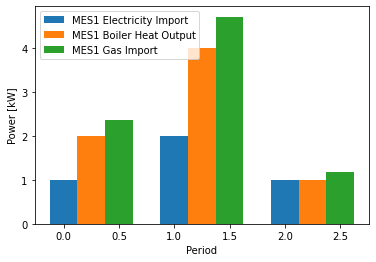

Costs: 1.21 (£)


In [2]:
model = pyo.ConcreteModel()
model.Set_Vectors = ['Electricity', 'Heat', 'Gas']

model.Name = 'MES1'
model.MES1_Set_DER = ['Boiler']
model.MES1_Boiler = {
    'Capacity': 5,
    'Vector': 'Heat',
    'Efficiency': [0.85],
    'Input': ['Gas'],
    'Output': ['Heat']
}

model.MES1_Electricity_Demand = [1, 2, 1]  # (kW)
model.MES1_Heat_Demand = [2, 4, 1]  # (kW)
model.MES1_Gas_Demand = [0, 0, 0]  # (kW)

model.MES1_Electricity_Import_Price = [0.15, 0.20, 0.25]  # (£/kWh)
model.MES1_Gas_Import_Price = [0.05, 0.05, 0.05]  # (£/kWh)
model.dt = 1

# Build and solve model
build_MES(model)

# Visualize
Fig_Names = ['MES1_Electricity_Import', 'MES1_Boiler_Heat_Output',
             'MES1_Gas_Import']
plot_MES(model, Fig_Names)
sankey_MES(model, 'MES with gas boiler')
print('Costs: %.2f'%model.Objective_Function.expr(), '(£)')

[Back to top](#Multi-energy-generation-systems---General-formulation-examples)

## MES with solar PV and storage

The general MES formulation can seamlesly be extended to include different energy applications (modelled as vectors) and technologies (modelled as energy hubs). For exaple, let us consider the building energy system presented below, which includes solar PV, Battery Energy Storage (BES) and a Gas boiler.

![Building_Boiler_PV_BES.png](Figures/Building_Boiler_PV_BES.png)

The solar radiation (insolation) is modelled as a new vector, i.e., the system includes electricity, heat, gas and insolation. Also, the PV system, BES and Boiler are modelled as energy hubs.

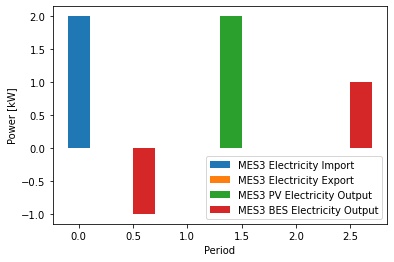

Costs: 0.71 (£)


In [3]:
model = pyo.ConcreteModel()
model.Set_Vectors = ['Electricity', 'Heat', 'Gas', 'Insolation']
model.dt = 1

model.Name = 'MES3'
model.MES3_Set_DER = ['Boiler', 'PV', 'BES']
model.MES3_Boiler = {
    'Capacity': 5,
    'Vector': 'Heat',
    'Efficiency': [0.85],
    'Input': ['Gas'],
    'Output': ['Heat']
}
model.MES3_PV = {
    'Capacity': 4,
    'Vector': 'Electricity',
    'Efficiency': [1],
    'Input': ['Insolation'],
    'Output': ['Electricity']
}
model.MES3_BES = {
    'Capacity': 2,
    'Vector': 'Electricity'
}

model.MES3_Electricity_Demand = [1, 2, 1]  # (kW)
model.MES3_Heat_Demand = [2, 4, 1]  # (kW)

model.MES3_Electricity_Import_Price = [0.15, 0.20, 0.25]  # (£/kWh)
model.MES3_Electricity_Export_Price = [0.01, 0.01, 0.01]  # (£/kWh)
model.MES3_Insolation_Import_Price = [0, 0, 0]  # (£/kWh)
model.MES3_Gas_Import_Price = [0.05, 0.05, 0.05]  # (£/kWh)

model.MES3_Insolation_Import_Limit = [0, 2, 0]  # (kW)

# Build and solve model
build_MES(model)

# Visualize
Fig_Names = ['MES3_Electricity_Import', 'MES3_Electricity_Export',
             'MES3_PV_Electricity_Output', 'MES3_BES_Electricity_Output']
plot_MES(model, Fig_Names)
#Fig_Names = ['MES3_Gas_Import', 'MES3_Boiler_Heat_Output']
#plot_MES(model, Fig_Names)
sankey_MES(model, 'MES with PV, BES and gas boiler')
print('Costs: %.2f'%model.Objective_Function.expr(), '(£)')

[Back to top](#Multi-energy-generation-systems---General-formulation-examples)

## MES with PV and Storage - Time series

The model can be easily extended to consider longer time series by adding the relevant data as shown below.

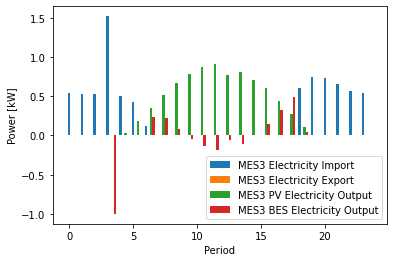

Costs: 4.70 (£)


In [4]:
model = pyo.ConcreteModel()
model.Set_Vectors = ['Electricity', 'Heat', 'Gas', 'Insolation']
model.dt = 1

model.Name = 'MES3'
model.MES3_Set_DER = ['Boiler', 'PV', 'BES']
model.MES3_Boiler = {
    'Capacity': 5,
    'Vector': 'Heat',
    'Efficiency': [0.85],
    'Input': ['Gas'],
    'Output': ['Heat']
}
model.MES3_PV = {
    'Capacity': 1,
    'Vector': 'Electricity',
    'Efficiency': [1],
    'Input': ['Insolation'],
    'Output': ['Electricity']
}
model.MES3_BES = {
    'Capacity': 1,
    'Vector': 'Electricity'
}

model.MES3_Electricity_Demand = [0.54, 0.53, 0.53, 0.52, 0.53, 0.61, 0.71, 0.74, 0.75, 0.74, 0.73, 0.73, 0.71, 0.70, 0.71, 0.74, 0.76, 0.76, 0.76, 0.76, 0.73, 0.65, 0.57, 0.54]  # (kW)
model.MES3_Heat_Demand = [0.11, 0.03, 0.04, 0.06, 0.07, 0.08, 0.08, 0.19, 0.27, 0.19, 0.12, 0.09, 0.07, 0.09, 0.10, 0.09, 0.08, 0.08, 0.13, 0.15, 0.16, 0.17, 0.19, 0.20]  # (kW)

model.MES3_Electricity_Import_Price = [0.50, 0.49, 0.48, 0.48, 0.50, 0.57, 0.67, 0.71, 0.72, 0.71, 0.72, 0.72, 0.70, 0.69, 0.70, 0.72, 0.74, 0.73, 0.72, 0.71, 0.68, 0.62, 0.54, 0.51]  # (£/kWh)
model.MES3_Electricity_Export_Price = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]  # (£/kWh)
model.MES3_Insolation_Import_Price = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00]  # (£/kWh)
model.MES3_Gas_Import_Price = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]  # (£/kWh)

model.MES3_Insolation_Import_Limit = [0.00, 0.00, 0.00, 0.00, 0.03, 0.18, 0.35, 0.52, 0.67, 0.79, 0.87, 0.91, 0.77, 0.81, 0.71, 0.60, 0.44, 0.27, 0.11, 0.01, 0.00, 0.00, 0.00, 0.00]  # (kW)

# Build and solve model
build_MES(model)

# Visualize
Fig_Names = ['MES3_Electricity_Import', 'MES3_Electricity_Export',
             'MES3_PV_Electricity_Output', 'MES3_BES_Electricity_Output']
plot_MES(model, Fig_Names)
#Fig_Names = ['MES3_Gas_Import', 'MES3_Boiler_Heat_Output']
#plot_MES(model, Fig_Names)
sankey_MES(model, 'MES with PV, BES and gas boiler')
print('Costs: %.2f'%model.Objective_Function.expr(), '(£)')

[Back to top](#Multi-energy-generation-systems---General-formulation-examples)

## MES with shedding options

The model can use the vector representation to model energy vectors as well as dedicated energy applications such as load shedding.

In [5]:
model = pyo.ConcreteModel()
model.Set_Vectors = ['Electricity', 'Heat', 'Cooling', 'Gas', 'Shedding']
model.dt = 1

model.Name = 'MES5'
model.MES5_Set_DER = ['CHP', 'Chiller', 'Shedding_Electricity', 'Shedding_Heat', 'Shedding_Cooling']
model.MES5_CHP = {
    'Capacity': 5,
    'Vector': 'Heat',
    'Efficiency': [0.35, 0.45],
    'Input': ['Gas', 'Gas'],
    'Output': ['Electricity', 'Heat']
}
model.MES5_Chiller = {
    'Capacity': 5,
    'Vector': 'Cooling',
    'Efficiency': [1],
    'Input': ['Heat'],
    'Output': ['Cooling']
}
model.MES5_Shedding_Electricity = {
    'Capacity': 100,
    'Vector': 'Shedding',
    'Efficiency': [1],
    'Input': ['Shedding'],
    'Output': ['Electricity']
}
model.MES5_Shedding_Heat = {
    'Capacity': 100,
    'Vector': 'Shedding',
    'Efficiency': [1],
    'Input': ['Shedding'],
    'Output': ['Heat']
}
model.MES5_Shedding_Cooling = {
    'Capacity': 100,
    'Vector': 'Shedding',
    'Efficiency': [1],
    'Input': ['Shedding'],
    'Output': ['Cooling']
}

model.MES5_Electricity_Demand = [1, 2, 1]  # (kW)
model.MES5_Heat_Demand = [2, 2, 1]  # (kW)
model.MES5_Cooling_Demand = [1, 3, 0]  # (kW)

#model.MES5_Electricity_Import_Price = [0.15, 0.20, 0.25]  # (£/kWh)
#model.MES5_Electricity_Export_Price = [0.01, 0.01, 0.01]  # (£/kWh)
model.MES5_Gas_Import_Price = [0.05, 0.05, 0.05]  # (£/kWh)
model.MES5_Shedding_Import_Price = [1000, 1000, 1000]  # (£/kWh)

# Build and solve model
result=build_MES(model)

# Visualize
sankey_MES(model, 'Sankey diagram')
print('Costs: %.2f'%model.Objective_Function.expr(), '(£)')

Costs: 4365.62 (£)


[Back to top](#Multi-energy-generation-systems---General-formulation-examples)